# EDA + Logistic Regression + PCA

In [1]:
# Importing necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
data = pd.read_csv("adult.csv")

## Performing EDA

In [3]:
# Checking head of the data
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Checking shape of the data
data.shape

(32561, 15)

In [5]:
# Describing the data
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Viewing summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have no null values in the dataset but from the head of the dataset, we can see that there are some values which are encoded as "?".
Here we can subtitute the values containing "?" with Nan

In [7]:
# Replacing all the ? with Nan
data = data.replace("?",np.nan)

In [8]:
# Checking head of the data again
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


All the values conntaining "?" are replaced with NaN

In [9]:
# Checking null value count of each column
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

- Now we can see the "workclass", "occupation" and "native.country" have some missing values in them.
- Since these all are categorical variables, we can replace the missing values with the most occuring value among them i.e. Mode

In [10]:
# Replacing missing values with mode 
cols = ["workclass","occupation","native.country"]
for col in cols:
    data[col].fillna(data[col].mode()[0], inplace = True)

In [11]:
# Checking the number of missing values again
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

- There are no missing values in the dataset andd we can proceed further

### Setting feature and target variable

In [12]:
X = data.drop(["income"],axis = 1)
y = data["income"]

### Splitting the data into train and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

### Feature Engineering

In [14]:
from sklearn import preprocessing
cateogorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

for feature in cateogorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

In [15]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [16]:
# Checking head of X_train
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


## Logistic Regression model 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [18]:
# Instantiate LogisticRegression
logreg = LogisticRegression()

In [19]:
# Fitting the model
logreg.fit(X_train,y_train)

LogisticRegression()

In [20]:
# Predicting with the model
y_pred = logreg.predict(X_test)

In [21]:
# Checking the accuracy of the model
print("Accuracy of the model with all features is: ",accuracy_score(y_test,y_pred))

Accuracy of the model with all features is:  0.8216808271061521


## Logistic Regression with PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()
X_train = pca.fit_transform(X_train)

In [24]:
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

- We can see that more than 97% of the variance is explained by the first 13 variable.
- So, we can drop the last variable as it explains only 2.7% of the variable.

### Logistic Regression with first 13 variables

In [25]:
X = data.drop(["income","native.country"],axis = 1)
y = data["income"]

In [26]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [27]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)


In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features:',accuracy_score(y_test, y_pred))

Logistic Regression accuracy score with the first 13 features: 0.8212713686150066


- We can see that the accuracy score has dropped from 82.16% to 82.12% when we chose first 13 variables.
- Lets drop the last two features and check with first 12 variables.

### Logistic Regression with first 12 variables

In [29]:
X = data.drop(["income","native.country","hours.per.week"], axis=1)
y = data["income"]

In [30]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [31]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [32]:
categorical = ["workclass","education","marital.status","occupation","relationship","race","sex"]

In [33]:
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

In [34]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns= X.columns)

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression accuracy score with the first 12 features: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy score with the first 12 features:  0.8227044733340158


- Choosing first 12 features for model building gives us accuracy as 82.27%. There is an increase in accuracy this time.
- Lets try again with first 11 features.

### Logistic Regression with first 11 features

In [36]:
X = data.drop(["income","native.country","hours.per.week","capital.loss"] , axis=1)
y = data["income"]

In [37]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size=0.7 , random_state=0)

In [38]:
categorical = ["workclass","education","marital.status","occupation","relationship","race","sex"]
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

In [39]:
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test) , columns=X.columns)

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(" Logistic Regression accuracy score with 11 features is : ", accuracy_score(y_test,y_pred))

 Logistic Regression accuracy score with 11 features is :  0.8186098884225612


- The accuracy score with 11 features again has droppped down to 81.86%.
- Our aim was to maximise the accuracy and the maximum accuracy was obtained with 12 features.

### Selecting right number of features 

- The above method to select right number of features can be used only when the number of features are less.
- The easy method of selecting the right number of features is using PCA. We just have to mention the amount of variance we want and the algorithm gives us the minimum number of features we have to use in order to get the desired result.

In [41]:
X = data.drop(["income"] , axis=1)
y = data["income"]

In [42]:
# Splitting data into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=0.7 , random_state=0)

In [43]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

In [44]:
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns= X.columns)

In [45]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


- We get the number of dimensions required from the above code which uses PCA.

### Plotting Explained_Variance_ratio with number of dimensions

- An alternative is to plot explained_variance_ratio as a function of number of dimensions.
- In the plot, we should look for an elbow where the explained variance stops growing fast.

<function matplotlib.pyplot.show(close=None, block=None)>

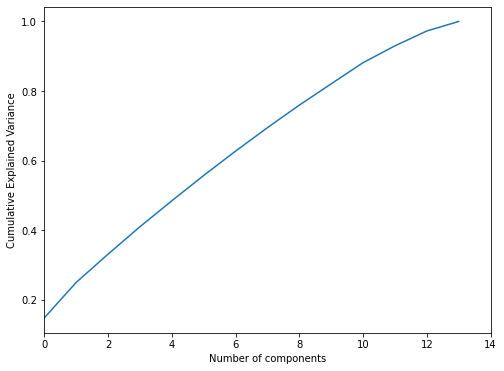

In [46]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.show

- The above plot shows that almost 90% of the variance is explained by first 12 variables.